# <font color='teal'> <b> STEMFIE-X Christmas edition </b></font>

## <font color='purple'> <b> Create your own cookie cutter </b></font>

A short guide to making a simple cookie cutter using the CadQuery library and the Python programming language.

### <font color='teal'> <b> Step 1.</b></font>

Draw the outline of the cookie cutter in Inkscape. The contour must be a continuous smooth curve without loops. You can also use an bitmap image a.e. from [www.freepik.com](https://www.freepik.com/free-photos-vectors/christmas-tree-cookie) or a suitable photo, which you convert to a curve using the **Path - TraceBitmap** function.

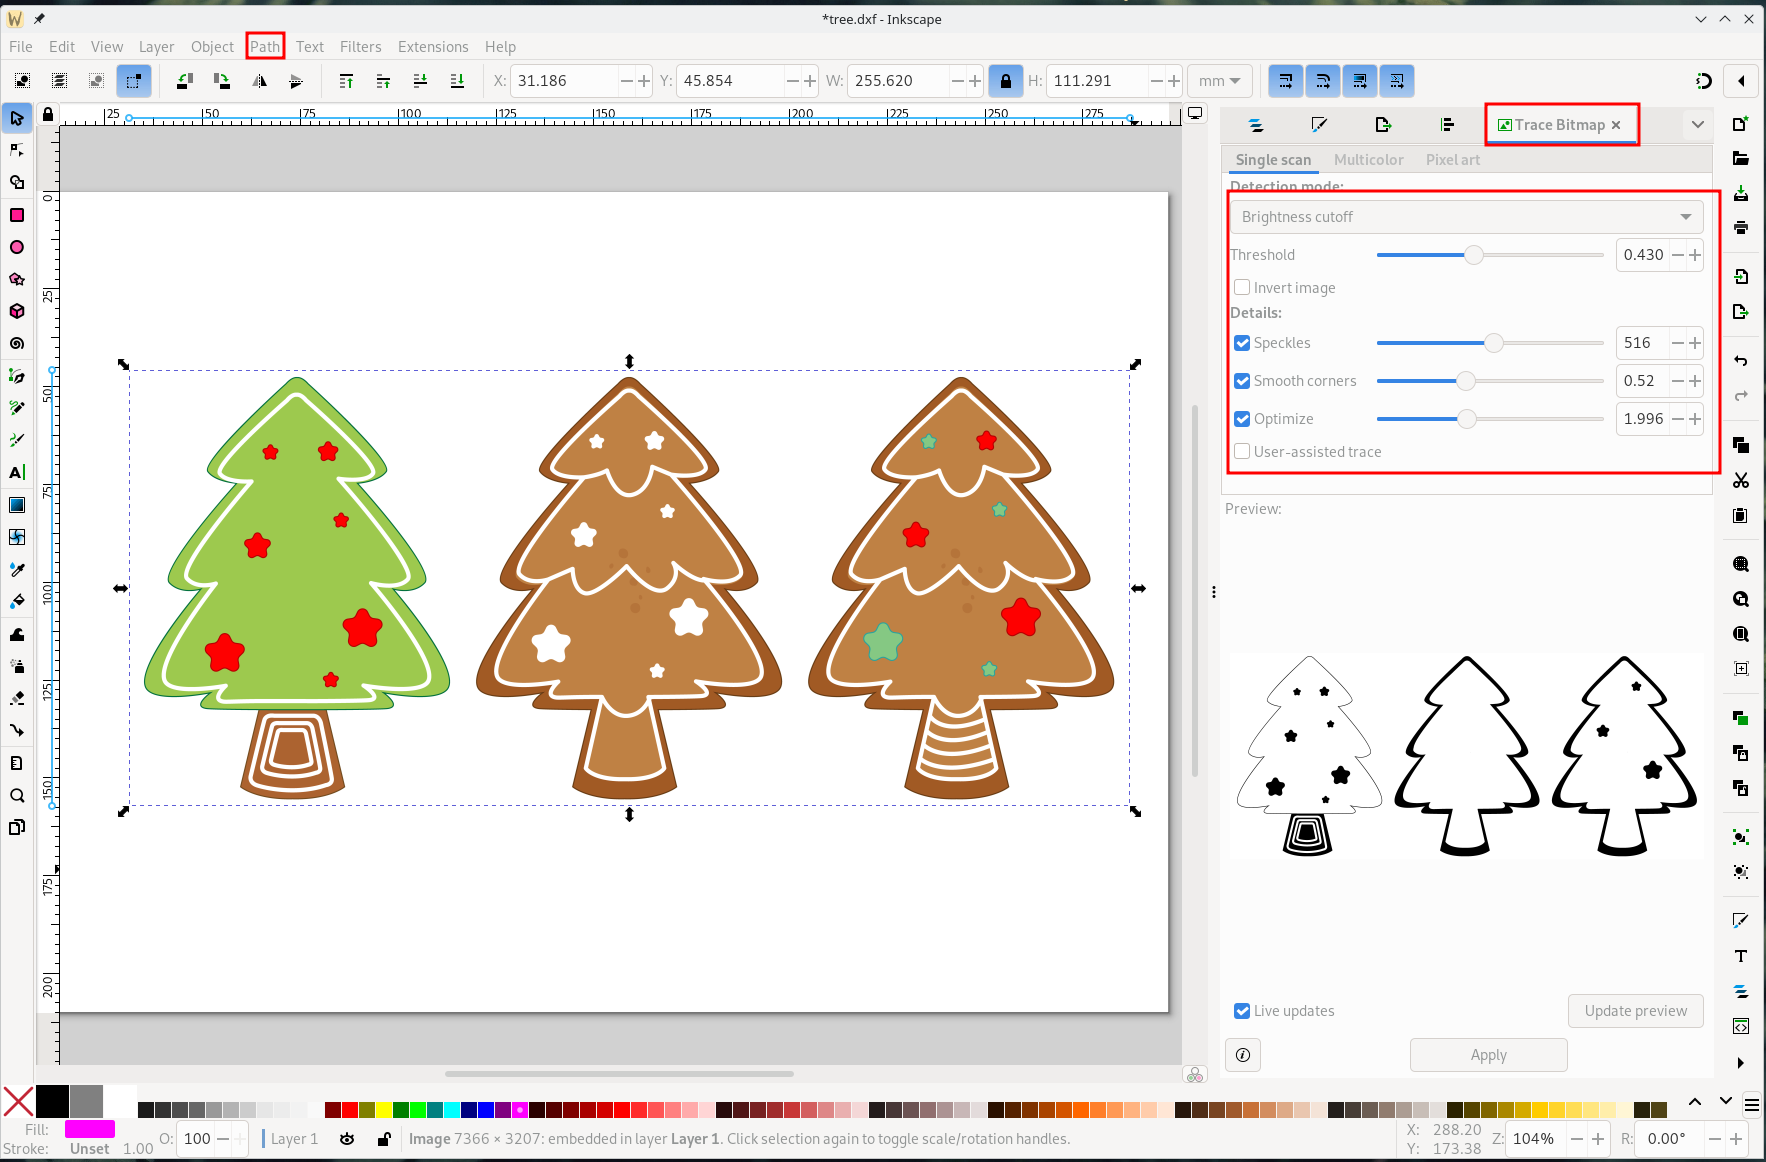

In [48]:
from IPython.display import Image
Image(filename='./img/christmas_special/ch_img_01.png', width=800)

### <font color='teal'> <b> Step 2.</b></font>

Using the editing functions of the program, remove unnecessary parts, adjust the curves after the conversion so that the outline is only one line and contains the minimum number of vertices. Use the functions **Path - Break Apart** and **Path - Simplify**.

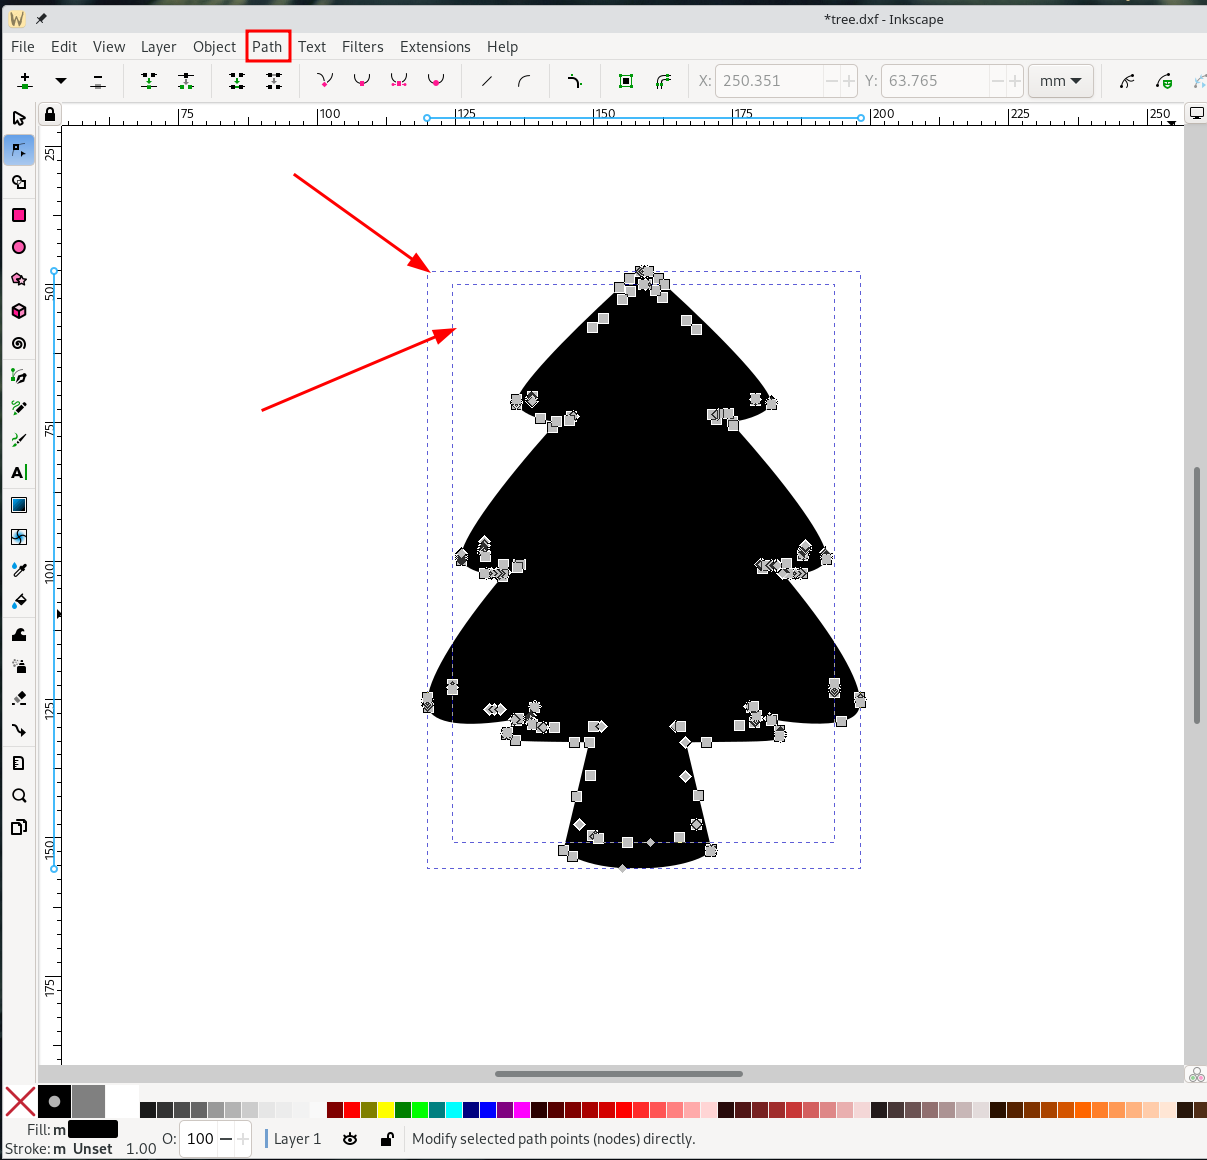

In [51]:
Image(filename='./img/christmas_special/ch_img_03.png', width=800)

### <font color='teal'> <b> Step 3.</b></font>

Save the created outline as a file in the format **dxf** vo verzii AutoCAD DXF R12.

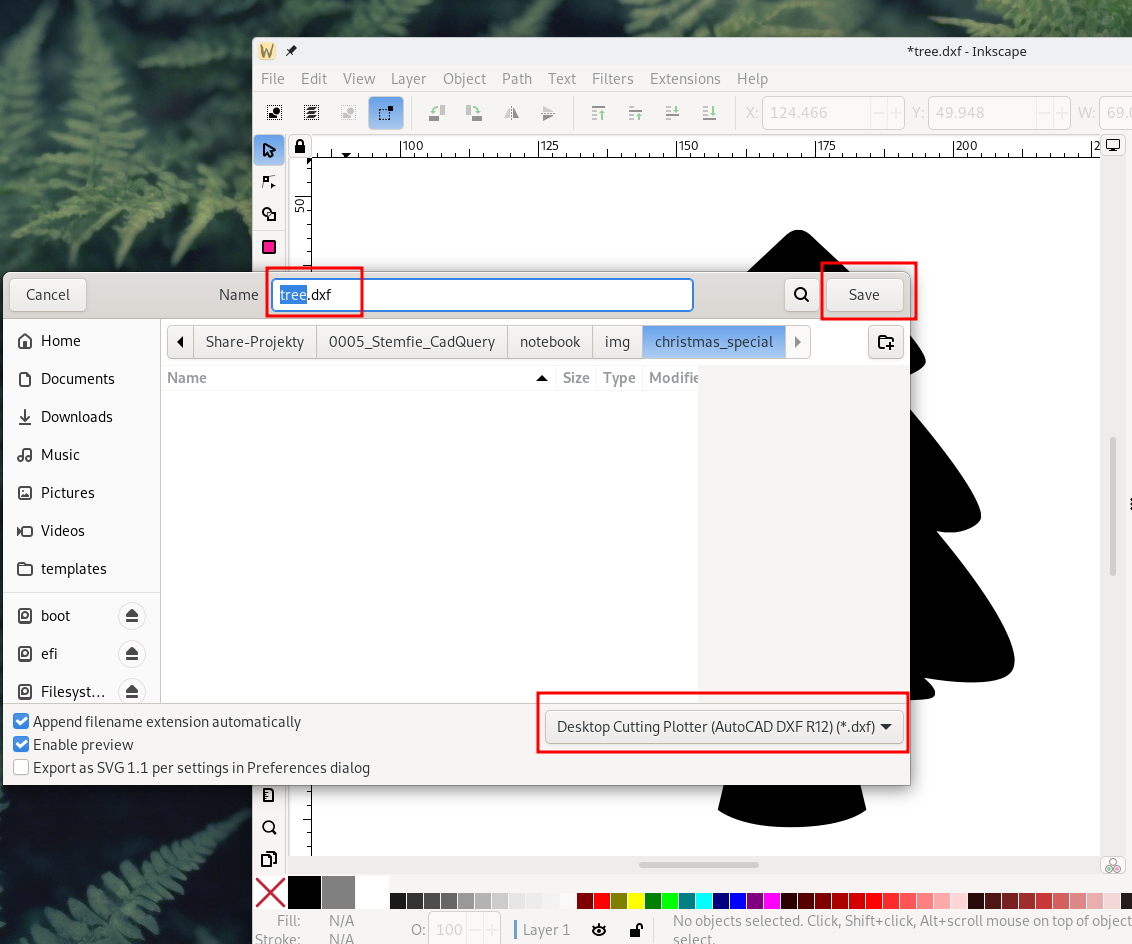

In [52]:
Image(filename='./img/christmas_special/ch_img_05.png', width=800)

### <font color='teal'> <b> Step 4.</b></font>

You can check the saved file in one of the CAD editors, for example LibreCAD.

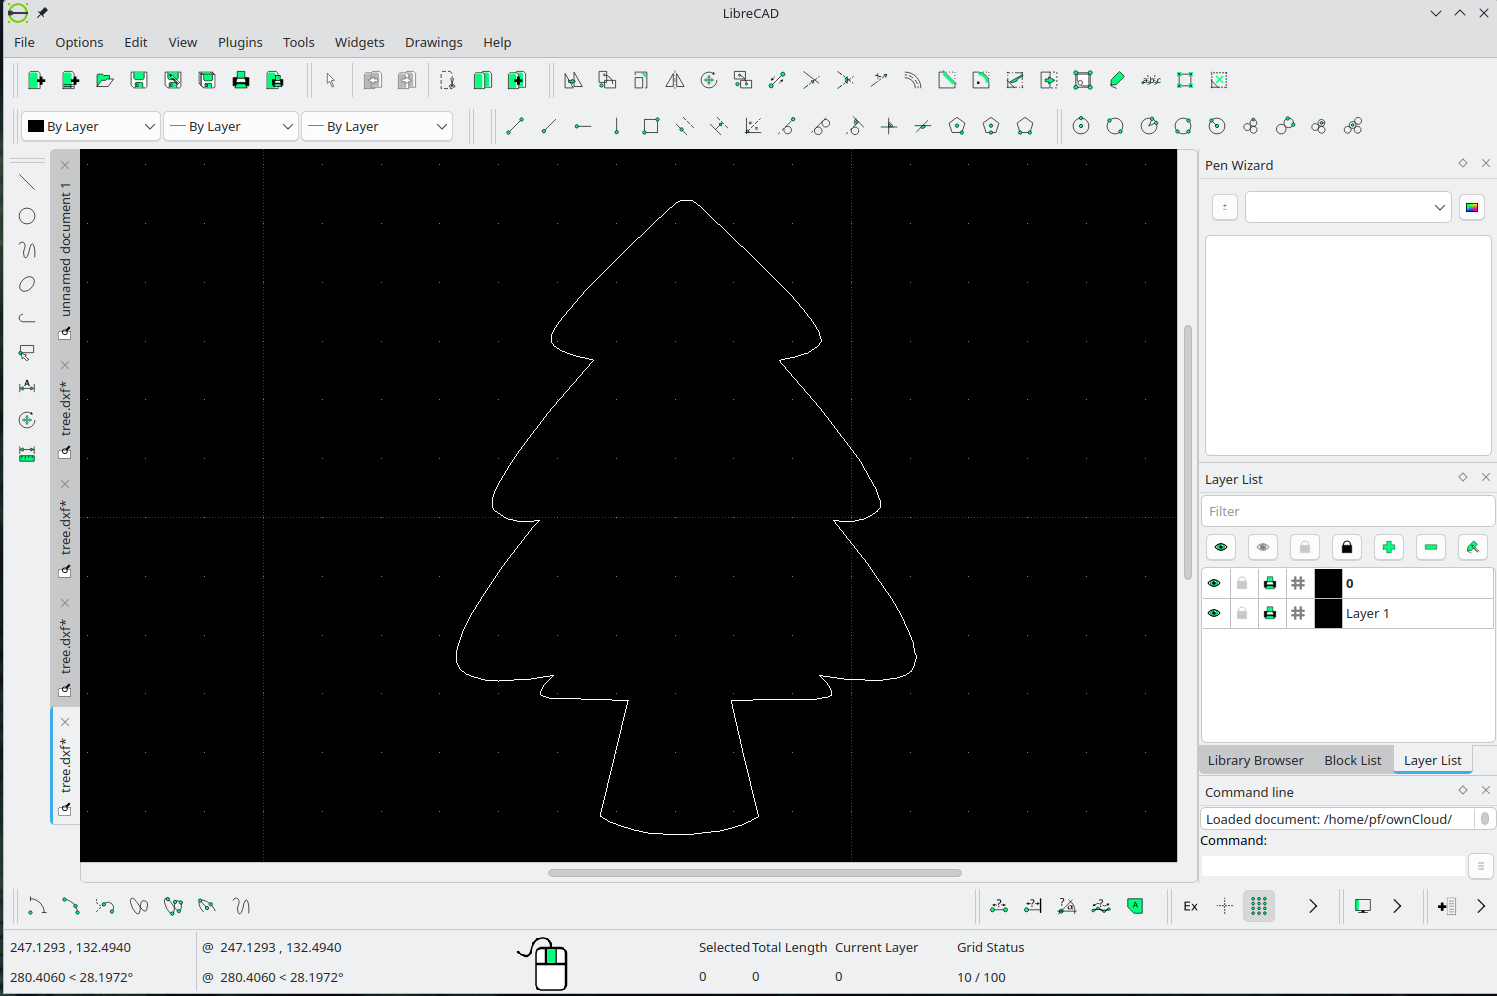

In [53]:
Image(filename='./img/christmas_special/ch_img_06.png', width=800)

### <font color='teal'> <b> Step 5.</b></font>

In the following script, edit the paths and names of your file. You can run the script directly in the Jupyter notebook or as a separate program from your favorite environment for the Python programming language.

If the input outline **dxf** file is correct, sktript will generate an **stl** file for the 3D slicer program

In [46]:
%reset -sf
import cadquery as cq
from cadquery import exporters

file_name = './img/christmas_special/tree.dxf'
stl_name = 'tree.stl'

h1 = 5    # vyska ramiku
d1 = 5    # hrubka ramiku

hh = [  10,   13,   15,   15]
dd = [-2.0, -2.4, -2.8, -3.2]

# vonkajsi obrys ramu
r1 = (
    cq.importers.importDXF(file_name)
    .wires().toPending()
    .extrude(h1)
)

# vnutorny obrys ramu
r2 = (
    cq.importers.importDXF(file_name)
    .wires().toPending()
    .offset2D(-d1)
    .extrude(h1)
)

# vyrezavacia plocha
w =[]
for index, value in enumerate(hh): 
    temp = (
        cq.importers.importDXF(file_name)
        .wires().toPending()
        .offset2D(dd[index])
        .extrude(value)
    )
    w.append(temp)

# vyskladanie formy
r1 = r1.cut(r2)     # ram

for i in range(1, len(hh)-1):
    w[0] = w[0].union(w[i])        
w[0] = w[0].cut(w[-1])

r1 = r1.union(w[0])
exporters.export(r1, stl_name)
display(r1)

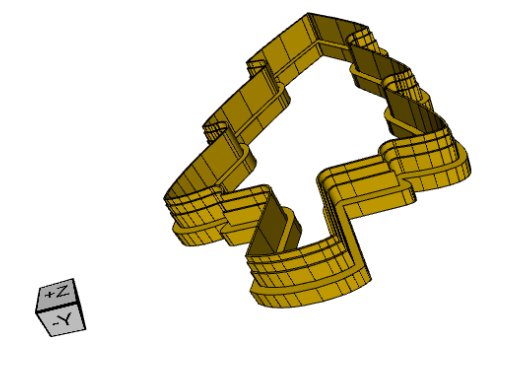

In [55]:
Image(filename='./img/christmas_special/ch_img_08.png', width=400)

### <font color='teal'> <b> Step 6.</b></font>

Process the STL file using the standard procedure for 3D printing materials.

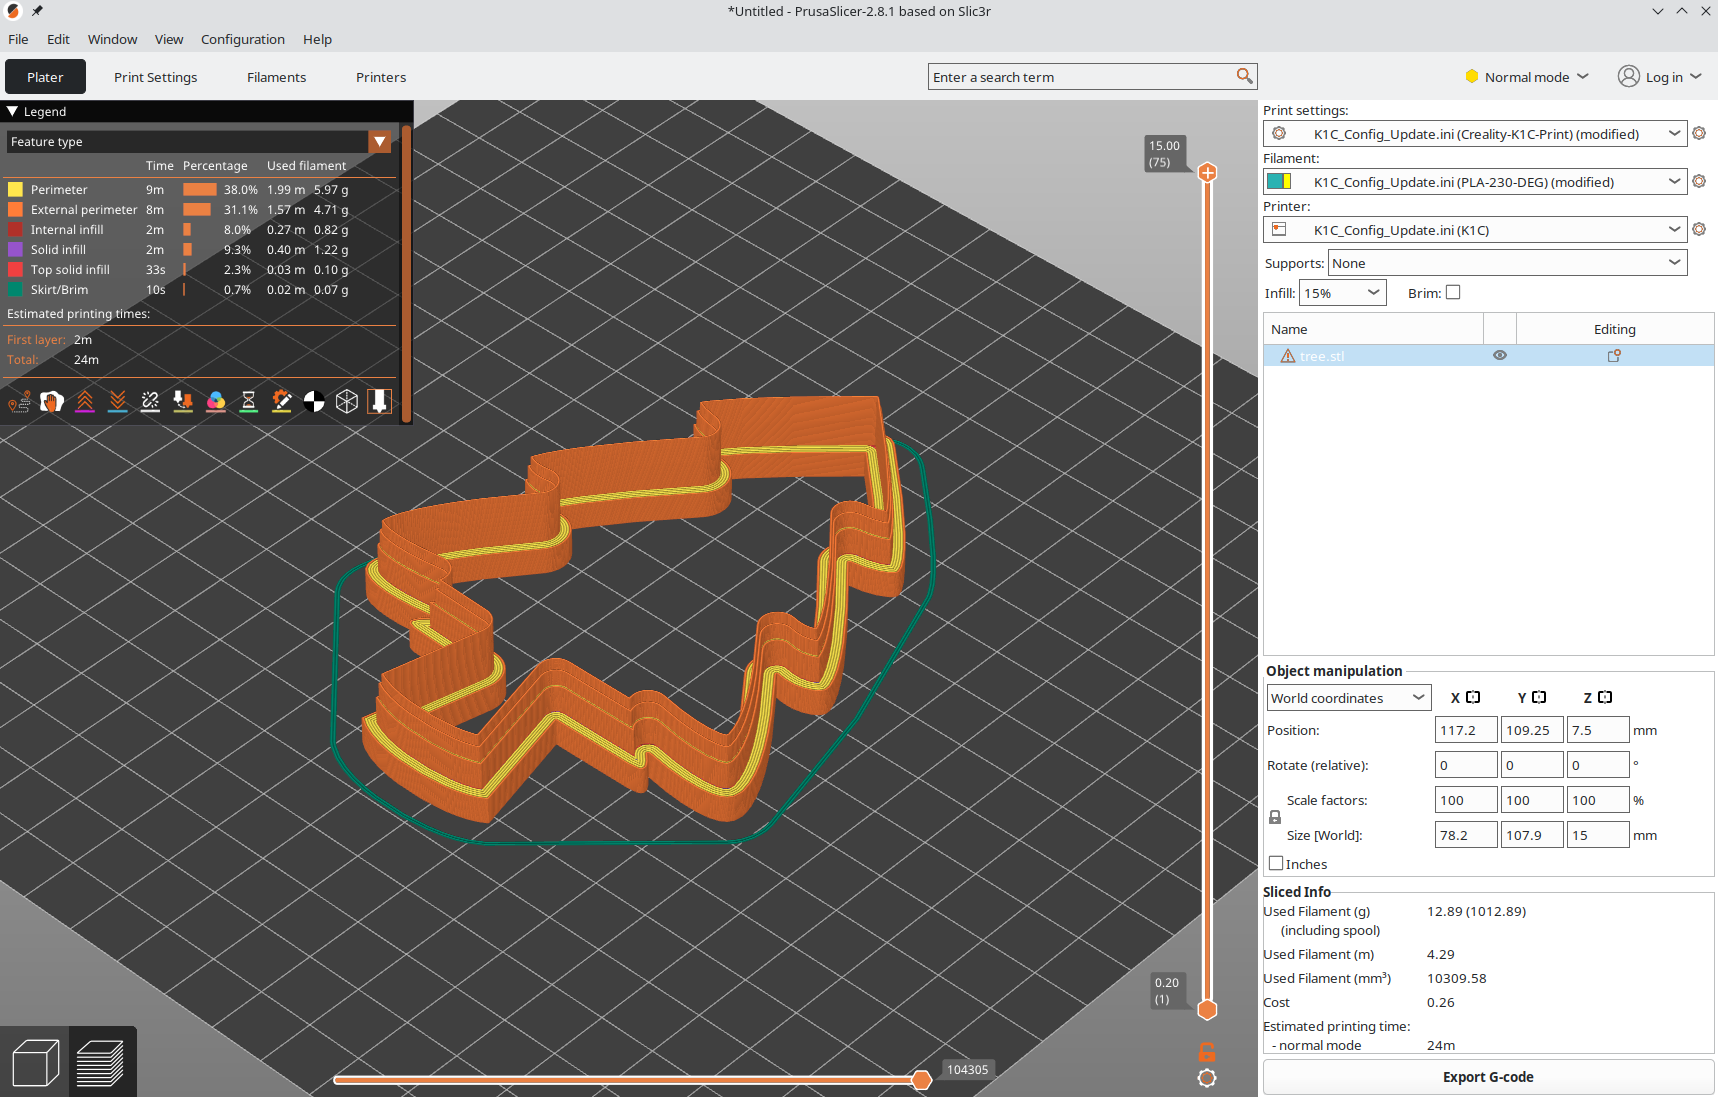

In [56]:
Image(filename='./img/christmas_special/ch_img_07.png', width=800)

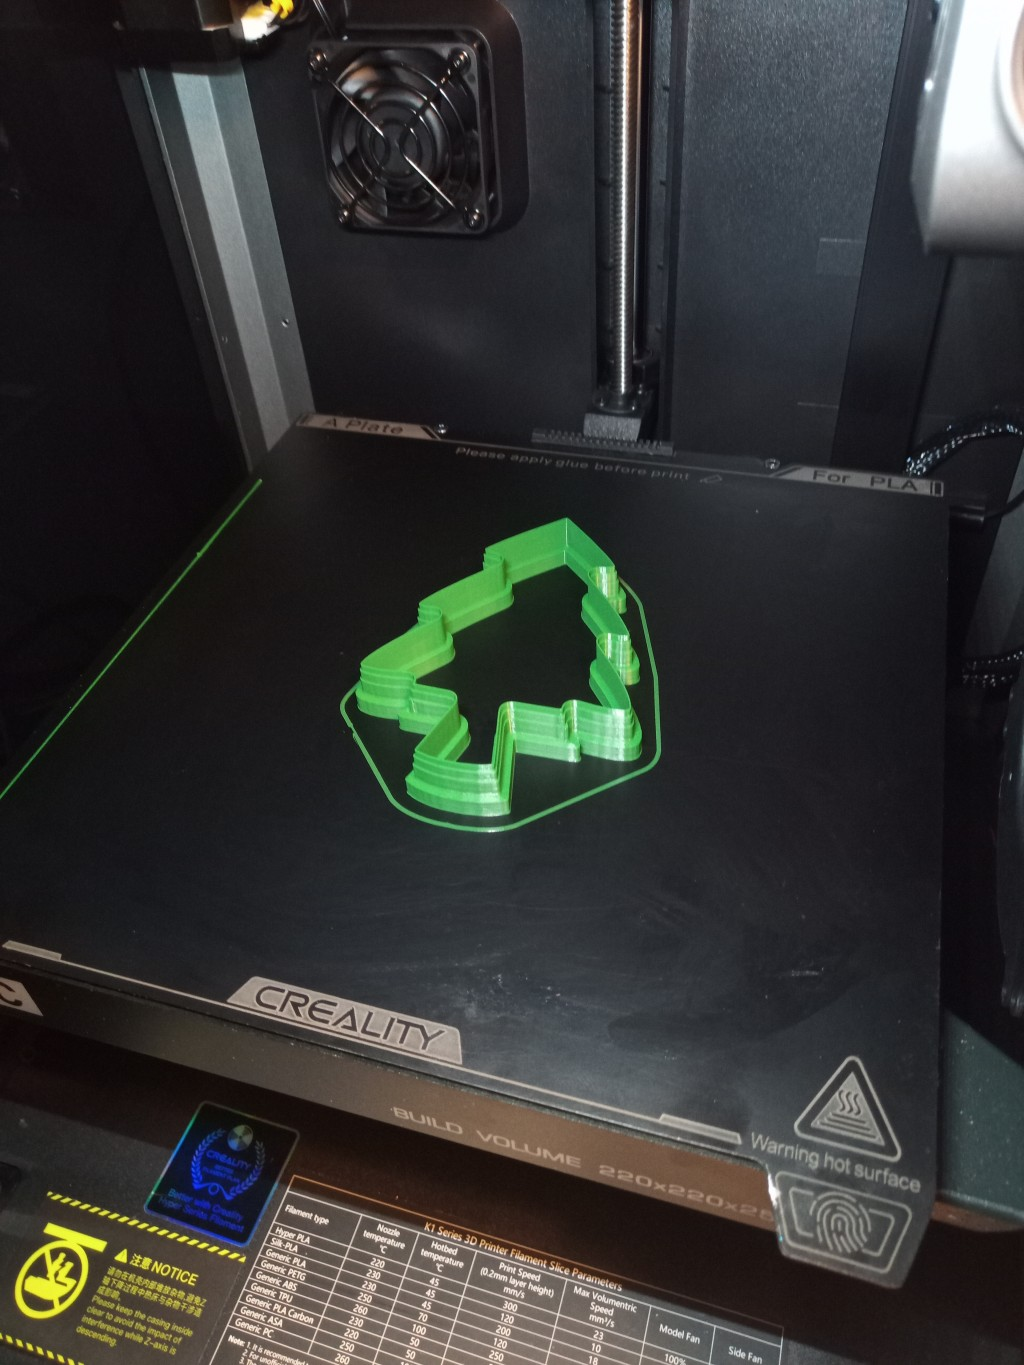

In [59]:
Image(filename='./img/christmas_special/ch_img_09.jpg', width=600)